In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [2]:
heart_prev = pd.read_csv("heart_disease.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_prev.head())
display(heart_prev.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group,Income Group
0,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,<30000,0-7,<50000
1,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<30000,0-7,<50000
2,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0,<30000,0-7,<50000
3,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0,<30000,0-7,<50000
4,1109,23.329629,32.285360,37.212078,33.779183,34.154532,13.474276,6.706302,2.0,33376.0,30250.0,>=30000,0-7,<50000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 14 columns):
Zip Code                    4396 non-null int64
Smoking Prevalence          4396 non-null float64
Hypertension Prevalence     4396 non-null float64
Obesity Prevalence          4396 non-null float64
Sedentarism Prevalence      4396 non-null float64
Cholesterol Prevalence      4396 non-null float64
Diabetes Prevalence         4396 non-null float64
Heart Disease Prevalence    4396 non-null float64
Restaurant Count            4396 non-null float64
median_household_income     4396 non-null float64
Population                  4396 non-null float64
Population Group            4396 non-null object
Restaurant Group            4396 non-null object
Income Group                4396 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 480.9+ KB


None

# In-depth Analysis

The data is split into the target variable, heart disease prevalence (y), and its features (X).

We will use various untuned supervised learning estimators to see which works best by default. We will then tune the top-performing estimators. The metric used for performance will be R2 and 5-fold cross-validation with be performed.

Training will be performed using 80% of the data, and 20% will be reserved for final evaluation of the model.

In [3]:
# Import split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Select features and target variable
X = heart_prev.drop(columns=["Zip Code", "Heart Disease Prevalence","Restaurant Count",
                     "Population Group","Restaurant Group","Income Group"])
y = heart_prev[["Heart Disease Prevalence"]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

cv_scores= cross_val_score(reg, X_train, y_train, cv=5, scoring="r2")

scores = dict()
scores["Linear Regression"] = np.mean(cv_scores)

print("Linear Regression cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Linear Regression"])

Linear Regression cross validation scores:
89.11319500170383
88.93777305810826
88.17987303181222
88.7050983655701
86.77398387055491

Average Score on 5-Folds:  0.8834198466554986


### Lasso Regression

In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

cv_scores= cross_val_score(lasso, X_train, y_train, cv=5, scoring="r2")

scores["Lasso Regression"] = np.mean(cv_scores)

print("Lasso Regression cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Lasso Regression"])

Lasso Regression cross validation scores:
86.63379889698635
85.38824294032945
83.59930979803775
86.0072099759644
82.4771869038925

Average Score on 5-Folds:  0.848211497030421


### Ridge Regressor

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)

cv_scores= cross_val_score(ridge, X_train, y_train, cv=5, scoring="r2")

scores["Ridge Regression"] = np.mean(cv_scores)

print("Ridge Regression cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Ridge Regression"])

Ridge Regression cross validation scores:
89.11335839283964
88.93781721212429
88.17974589116955
88.70516590421812
86.77393347729556

Average Score on 5-Folds:  0.8834200417552942


### Decision Tree

In [7]:
from sklearn import tree

trees = tree.DecisionTreeRegressor(max_depth=6, random_state=42)
trees.fit(X_train, y_train)

cv_scores= cross_val_score(trees, X_train, y_train, cv=5, scoring="r2")

scores["Decision Tree"] = np.mean(cv_scores)

print("Decision Tree cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Decision Tree"])

Decision Tree cross validation scores:
82.77385880027393
85.88150457680824
88.25341803615973
86.70728172492889
85.30758765197955

Average Score on 5-Folds:  0.8578473015803005


### Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

cv_scores= cross_val_score(forest, X_train, y_train, cv=5, scoring="r2")

scores["Random Forest"] = np.mean(cv_scores)

print("Random Forest cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Random Forest"])

Random Forest cross validation scores:
88.79761953136153
89.11518436442782
90.61626247035262
88.35860476069064
89.40048393170865

Average Score on 5-Folds:  0.8925763101170826


### Adaptive Boost Regressor

In [9]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator=trees, random_state=42)
ada.fit(X_train, y_train)

cv_scores= cross_val_score(ada, X_train, y_train, cv=5, scoring="r2")

scores["AdaBoost"] = np.mean(cv_scores)

print("AdaBoost cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["AdaBoost"])

AdaBoost cross validation scores:
90.14251307107872
86.9285049613413
90.46103933656669
88.61632117004794
88.62803043413882

Average Score on 5-Folds:  0.8895528179463469


### Gradient Boost Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

cv_scores= cross_val_score(gbr, X_train, y_train, cv=5, scoring="r2")

scores["Gradient Boost Regressor"] = np.mean(cv_scores)

print("Gradient Boost Regressor cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Gradient Boost Regressor"])

Gradient Boost Regressor cross validation scores:
89.67855502181415
88.90224953062682
90.96069830021956
91.03790566532167
90.18840472520803

Average Score on 5-Folds:  0.9015356264863804


### Elastic Net

In [11]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

cv_scores= cross_val_score(elastic_net, X_train, y_train, cv=5, scoring="r2")

scores["Elastic Net"] = np.mean(cv_scores)

print("Elastic Net cross validation scores:")
for score in cv_scores:
    print(score*100)
    
print("\nAverage Score on 5-Folds: ", scores["Elastic Net"])

Elastic Net cross validation scores:
87.54614704136061
86.2152765983659
84.79567835421015
86.68154957554283
83.7000212393338

Average Score on 5-Folds:  0.8578773456176265


### Summary of un-tuned scores

A gradient boost regressor had the best default performance at 90.15% accuracy. The random forest performed similarly well at 89.26%. Both estimators should be evaluated for improved performance through tuning.

In [12]:
scores = sorted(scores.items(), key= lambda score: score[1], reverse=True)
for k,v in scores:
    print(k,": ",v*100)

Gradient Boost Regressor :  90.15356264863804
Random Forest :  89.25763101170826
AdaBoost :  88.95528179463469
Ridge Regression :  88.34200417552942
Linear Regression :  88.34198466554986
Elastic Net :  85.78773456176265
Decision Tree :  85.78473015803006
Lasso Regression :  84.8211497030421


## Hyperparamenter Tuning

The top two performing estimators, gradient boost and random forests, will be tuned and re-evaluated using R2 scoring.

### Tuned Gradient Boost Regression

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps = [("GBR", GradientBoostingRegressor(random_state=42))]

pipeline = Pipeline(steps)

params = {"GBR__n_estimators":[100, 200, 500],
          "GBR__max_depth":[3, 5]}

cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="r2")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = cv.best_score_*100

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
GBR__max_depth :  3
GBR__n_estimators :  200

Best score:  90.34453407384693


### Tuned Random Forest

In [14]:
steps = [("forest", RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

params = {"forest__n_estimators": [1, 5, 10, 50, 100, 200], \
          "forest__max_depth": [3, 5, 7]}
 
cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="r2")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = cv.best_score_*100

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
forest__max_depth :  7
forest__n_estimators :  100

Best score:  89.72381076698778


Gradient boost regression provides the best accuracy before and after tuning (90.3%).

## Feature importance

Now we examine which features provide the most predictive value for the model using Mutual Information scoring.

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

kbest = SelectKBest(score_func=mutual_info_regression, k=5)
kbest.fit(X, y)

feature_names = X.columns
feature_scores = list(zip(feature_names, kbest.scores_))

feature_scores.sort(key=lambda x:x[1], reverse=True)

for f,s in feature_scores[:10]:
    print(f,": ",s*100)

Hypertension Prevalence :  88.21781350697621
Cholesterol Prevalence :  85.7200706453753
Diabetes Prevalence :  79.68790999031015
Sedentarism Prevalence :  36.54539585897396
Obesity Prevalence :  27.841109440077272
Smoking Prevalence :  26.342795822576814
median_household_income :  23.628420320610477
Population :  3.35946138228822


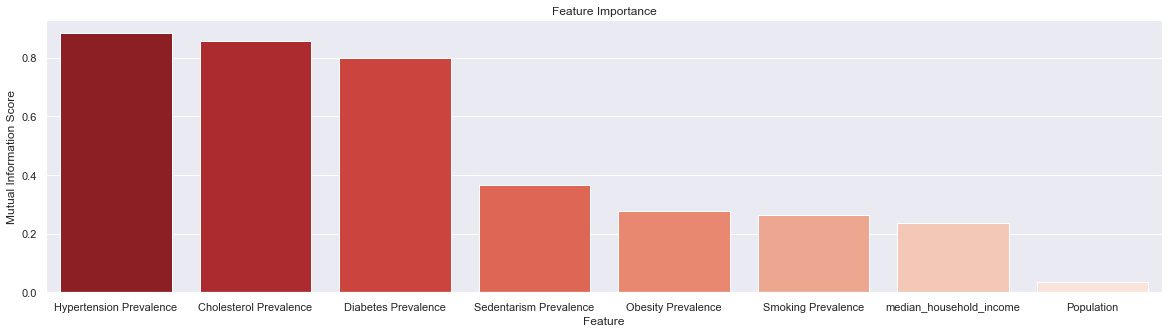

In [16]:
feature = []
score = []
for f,s in feature_scores:
    feature.append(f)
    score.append(s)
    
plt.subplots(figsize=(20,5))
plot = sns.barplot(feature, score, palette="Reds_r")
plot.set(title="Feature Importance",xlabel="Feature",ylabel="Mutual Information Score",)
plt.show()

Heart disease's well-known risk factors are the strongest predictors as expected. Median household income is approximately as strong of a predictor as well-known risk factors, smoking and obesity. Population contributes minimally to prediction.

## Final Results

The tuned gradient boost model will now be used on the test set as an evaluation of performance on unseen data.

In [17]:
gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=3)
gbr.fit(X_train, y_train)

train_score = gbr.score(X_train, y_train)
test_score = gbr.score(X_test, y_test)

print("Training set score: ", train_score*100)
print("Test set score: ", test_score*100)

Training set score:  94.55850895131313
Test set score:  90.07983816605054


The model shows good accuracy on both the training and the test sets. This model is expected to perform well on other unseen data.

## Recommendation

The model examines the impact of two socioeconomic factors (household income and population) on disease prevalence. This model can be taken further by incorporating other socioeconomic features such distance and means of transportation to work, education levels and home values.

Additionally, the model may also provide more insight using an updated dataset for fast food restaurant locations within the US.